In [6]:
data =load('D:\code\大三课程\机器学习\实验\实验一\实验二\orl.mat');
images = data.D;
features = data.X;
labels = data.y;

num_people = 40;
images_per_person = 10;

In [7]:
% 每行显示 10 张图像
num_rows = 40;
num_cols = size(images, 4) / num_rows;

% 设置图形窗口大小
% fig = figure;
% set(fig, 'Position', [100, 100, 1200, 1200]); % 调整窗口的位置和大小
% 重新组织图像数据，将10张图像堆叠在一起
reshaped_images = reshape(images, size(images, 1), size(images, 2), 1, []);

% 显示整个布局
%montage(reshaped_images, 'Size', [num_rows, num_cols]);

In [32]:
% 计算图像数据的平均值
mean_image = mean(images, 4); % 计算每个像素位置的平均值，结果是一个大小为 HxWxC 的数组

% 将平均图像的数据类型转换为双精度浮点数
mean_image = double(mean_image);
images = double(images);
N = 400;   % 图像数量
% 从每个图像中减去平均值，实现数据中心化
centered_images = images - repmat(mean_image, 1, 1, 1, N); % 使用 repmat 复制平均图像以与图像数据集的大小匹配

% montage(centered_images, 'Size', [num_rows, num_cols]);


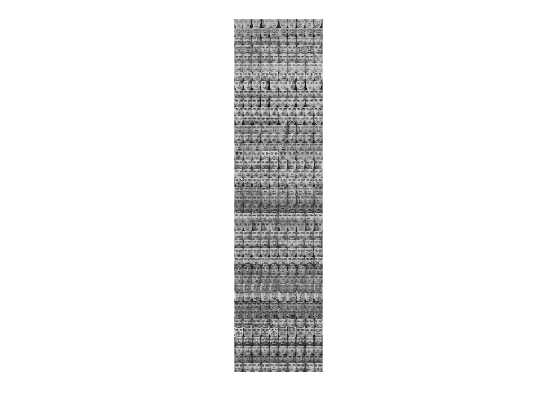

In [40]:
data =load('D:\code\大三课程\机器学习\实验\实验一\实验二\orl.mat');
images = data.D;
features = data.X;
labels = data.y;


% 每行显示 10 张图像
num_rows = 40;
num_cols = size(images, 4) / num_rows;

% 设置图形窗口大小
fig = figure;
set(fig, 'Position', [100, 100, 1200, 1200]); % 调整窗口的位置和大小
% 重新组织图像数据，将10张图像堆叠在一起
reshaped_images = reshape(images, size(images, 1), size(images, 2), 1, []);

% 显示整个布局
montage(reshaped_images, 'Size', [num_rows, num_cols]);


% 1. 去除平均值
mean_features = mean(features, 1);
centered_features = features - mean_features;
% montage(centered_features);

% 2. 计算协方差矩阵
cov_matrix = cov(centered_features');

% 3. 计算协方差矩阵的特征值和特征向量
[eigenvalues, eigenvectors] = eig(cov_matrix);

% 4. 将特征值排序
% 获取特征值的对角线
eigenvalues_diag = diag(eigenvalues);

% 对特征值进行降序排序，同时记录排序索引
[sorted_eigenvalues, sorted_indices] = sort(eigenvalues_diag, 'descend');

% 5. 保留前 N 个较大特征值对应的特征向量
K = 100; % 选择合适的 K 值

% 获取前 K 个较大特征值对应的特征向量
selected_eigenvectors = eigenvectors(:, sorted_indices(1:K));

% 6. 将数据转换到上述 N 维特征向量的坐标系中，实现特征压缩
reduced_features = centered_features' * selected_eigenvectors;
% montage(reduced_features);
